# Nonlinear Systems

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from dynamics import linear_dynamics

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Hartman-Grobman Linearisation Theorem

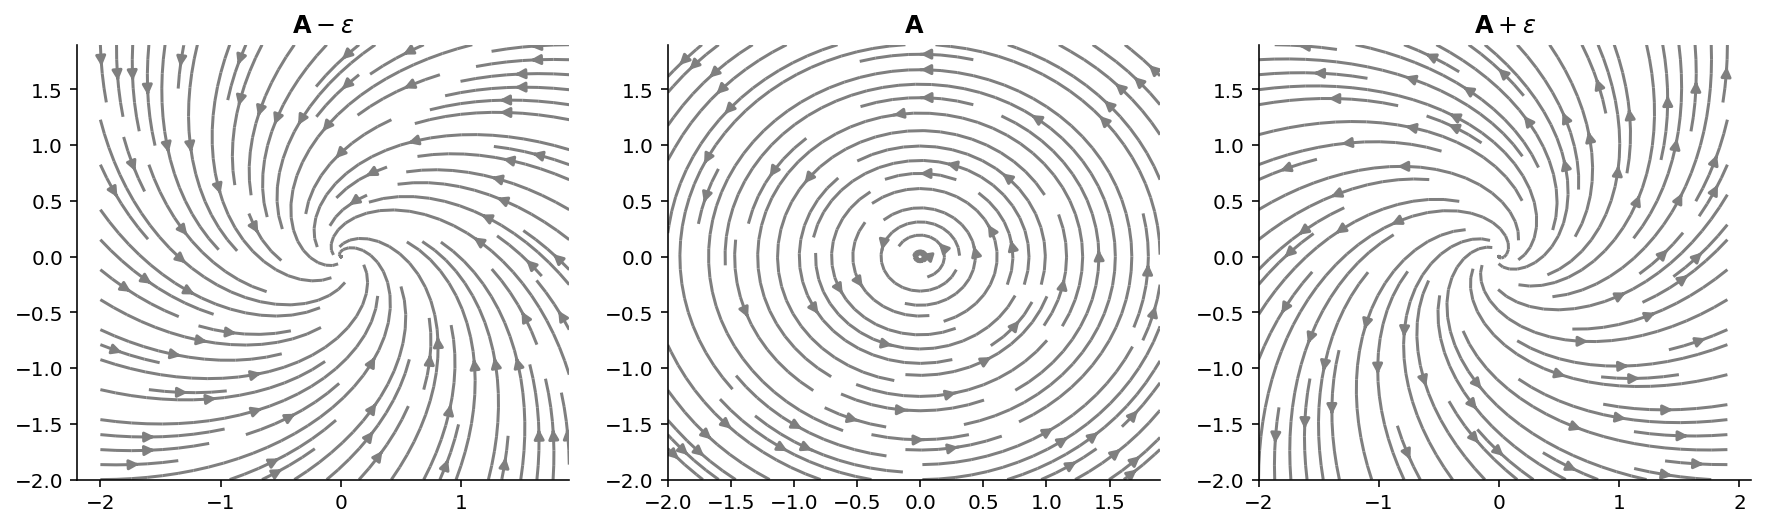

In [63]:
a, b = 0, 1e-2
A = np.array([[a, -b], [b, a]])

eps = 0.01
shocks = eps * np.array([-1, 0, 1])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for shock, axi in zip(shocks, ax):
    X, X_dot = linear_dynamics(A + shock * np.eye(2))
    sign = np.sign(shock)
    if sign == -1:
        sign = "-\epsilon\bf I$"
    elif sign == 1:
        sign = "+\epsilon\bf I$"
    else:
        sign = "$"
    axi.set_title(r"${\bf A}" f"{sign}")
    axi.streamplot(*X, *X_dot, color="tab:gray")

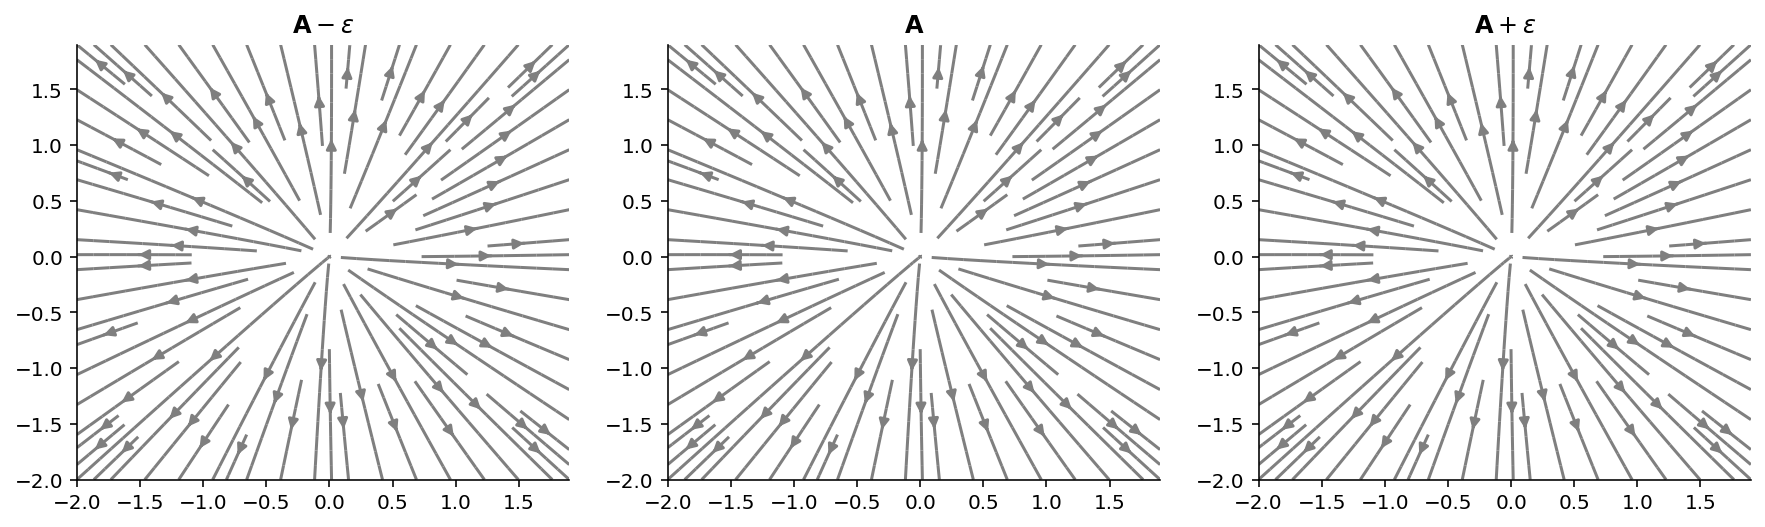

In [64]:
a, b = 1, 1e-2
A = np.array([[a, -b], [b, a]])

eps = 0.01
shocks = eps * np.array([-1, 0, 1])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for shock, axi in zip(shocks, ax):
    X, X_dot = linear_dynamics(A + shock * np.eye(2))
    sign = np.sign(shock)
    if sign == -1:
        sign = "-\epsilon\bf I$"
    elif sign == 1:
        sign = "+\epsilon\bf I$"
    else:
        sign = "$"
    axi.set_title(r"${\bf A}" f"{sign}")
    axi.streamplot(*X, *X_dot, color="tab:gray")

### Where HGLT fails

In [111]:
def f(x):
    x, y = x
    return (y - x ** 3, -x - y ** 3)


A = np.array([[0, 1], [-1, 0]])

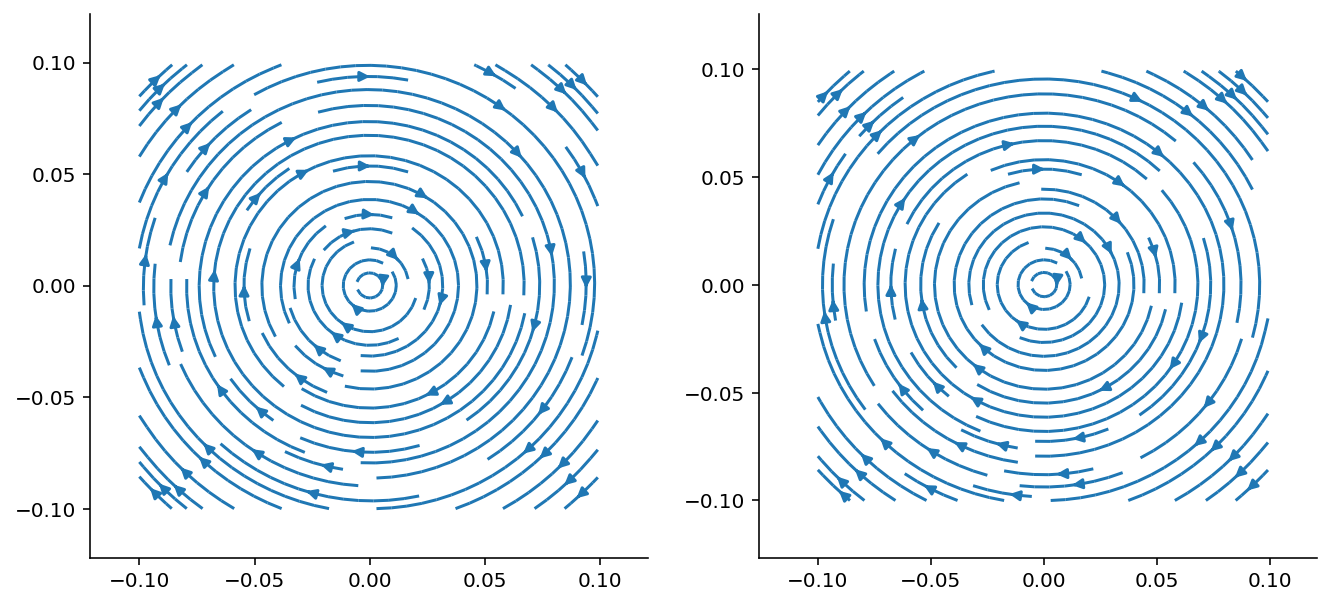

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

vmin, vmax, step = -0.1, 0.1, 1e-3

X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
ax[0].streamplot(*X, *X_dot)

X, X_dot = linear_dynamics(A, vmin=vmin, vmax=vmax, step=step)
ax[1].streamplot(*X, *X_dot)